In [1]:
import numpy as np
from numpy import genfromtxt

In [2]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def softmax(x):
    x = x
    e_x = np.exp(x-np.max(x))
    return e_x / e_x.sum()

def test_loss(x_in, y_in, weights1, weights2, biases1, biases2):
        out2 = pred_out(x_in, y_in, weights1, weights2, biases1, biases2)
        loss = []
        for iter in range(out2.shape[1]):
            loss.append(MSE(out2[:, iter], y_in[:, iter]))
        return np.mean(loss)

def pred_out(x_in, y_in, weights1, weights2, biases1, biases2):
        out1_temp = np.matmul(weights1.T, x_in[:,:])+biases1
        out1 = sigmoid(out1_temp)
        out2_temp = np.matmul(weights2.T, out1)+biases2
        out2 = (out2_temp)
        return out2

def acc_out(x_in, y_in, weights1, weights2, biases1, biases2):
    pred = pred_out(x_in, y_in, weights1, weights2, biases1, biases2)
    sum_acc = 0
    for iter in range(pred.shape[1]):
#         print(iter)
        sum_acc+=(np.argmax(pred[:, iter])==np.argmax(y_in[:, iter]))
    return sum_acc/y_in.shape[1]

def MSE(yHat, y):
    return np.sum(np.multiply(yHat - y, yHat - y)) / y.size

def cross_entropy(predictions, targets, epsilon=1e-5):
    predictions = np.clip(predictions, epsilon, 1. - epsilon)
    ce = - np.mean(np.multiply(np.log(predictions),targets)) 
    return ce

In [3]:
##Load and segregate the data
letters = genfromtxt('energy_eff2.csv', delimiter=',')
# np.random.shuffle(letters)
print(letters.shape)
x_in = letters[:, 0:8]
x_mean = np.mean(x_in, axis = 0)
x_std = np.std(x_in, axis = 0)
y_in = letters[:, 8:10]
y_mean = np.mean(y_in, axis=0)
y_std = np.std(y_in, axis = 0)
# y_in = (y_in-y_mean)/y_std
x_in = (x_in-x_mean)/x_std
# print(np.std(y_in, axis=0))

(768, 10)


In [4]:
x_train = x_in[0:int(x_in.shape[0]*0.7), :]
y_train = y_in[0:int(x_in.shape[0]*0.7), :]

x_test = x_in[int(x_in.shape[0]*0.7):x_in.shape[0], :]
y_test = y_in[int(x_in.shape[0]*0.7):x_in.shape[0], :]

In [5]:
hidden_size = 10
learning_rate = 0.1
num_epochs = 1000
alpha = 1
epsilon = 1e-8

weights1 = np.random.normal(size=(x_in.shape[1], hidden_size))
weights2 = np.random.normal(size=(hidden_size, y_in.shape[1]))
print(weights1.shape)
print(weights2.shape)
biases1 = np.random.normal(size=(hidden_size, 1))
biases2 = np.random.normal(size=(y_in.shape[1], 1))

x_train = np.matrix(x_train)
x_train = x_train.T
y_train = np.matrix(y_train)
y_train = y_train.T

x_test = np.matrix(x_test)
x_test = x_test.T
y_test = np.matrix(y_test)
y_test = y_test.T

(8, 10)
(10, 2)


In [6]:
accuracies_train = []
accuracies_test = []
losses = []
test_losses = []

biases1_squares = 0
biases2_squares = 0
weights1_squares = 0
weights2_squares = 0

for epoch_num in range(num_epochs):
    if epoch_num%5==1:
        print("test_loss : ", test_losses[-1])
        print("train_loss : ", losses[-1])
        print("epoch_num : ", epoch_num)
    for sample_num in range(x_train.shape[1]):
#         print("sample_num : ", sample_num)
        #Forward propagation
        out1_temp = np.matmul(weights1.T, x_train[:,sample_num])+biases1
        out1 = sigmoid(out1_temp)
        out2_temp = np.matmul(weights2.T, out1)+biases2
        out2 = (out2_temp)
        #Back-propogation
        error_out = out2-y_train[:, sample_num]
        err_2 = np.matrix(error_out)
        grad_2 = np.matmul(out1, err_2.T)
        err_1 = np.multiply(np.matmul(weights2, err_2), np.multiply(out1, np.ones(out1.shape)-out1))
        grad_1 = np.multiply(x_train[:, sample_num], err_1.T)
        #Updating the weights
        
        biases1_squares = alpha*biases1_squares+np.multiply(err_1, err_1)
        biases2_squares = alpha*biases2_squares+np.multiply(err_2, err_2)
        weights1_squares = alpha*weights1_squares+np.multiply(grad_1, grad_1)
        weights2_squares = alpha*weights2_squares+np.multiply(grad_2, grad_2)
        
        biases1 = biases1 - np.multiply(learning_rate/(np.sqrt(biases1_squares)+epsilon), err_1)
        biases2 = biases2 - np.multiply(learning_rate/(np.sqrt(biases2_squares)+epsilon), err_2)
        weights1 = weights1 - np.multiply(learning_rate/(np.sqrt(weights1_squares)+epsilon), grad_1)
        weights2 = weights2 - np.multiply(learning_rate/(np.sqrt(weights2_squares)+epsilon), grad_2)
        #Updating the accuracy and loss
        #End of for loop
#     print("accuracy : ", np.mean(acc_arr))
    test_losses.append(test_loss(x_test, y_test, weights1, weights2, biases1, biases2))
#     accuracies_test.append(acc_out(x_test, y_test, weights1, weights2, biases1, biases2))
#     accuracies_train.append(acc_out(x_train, y_train, weights1, weights2, biases1, biases2))
    losses.append(test_loss(x_train, y_train, weights1, weights2, biases1, biases2))
    

test_loss :  29.125063620781944
train_loss :  27.886172762573445
epoch_num :  1
test_loss :  13.293495272580405
train_loss :  11.246863474341463
epoch_num :  6
test_loss :  11.450141090810217
train_loss :  10.063754665691027
epoch_num :  11
test_loss :  9.920946088659829
train_loss :  9.033729667999914
epoch_num :  16
test_loss :  9.247341393171068
train_loss :  8.38881338951685
epoch_num :  21
test_loss :  8.756773995721142
train_loss :  7.95385863127667
epoch_num :  26
test_loss :  8.297064515783758
train_loss :  7.562994206252157
epoch_num :  31
test_loss :  7.853212749634959
train_loss :  7.199578645168721
epoch_num :  36
test_loss :  7.431388182590002
train_loss :  6.862610227442156
epoch_num :  41
test_loss :  7.047483170652594
train_loss :  6.552954465581658
epoch_num :  46
test_loss :  6.716611579959346
train_loss :  6.268672183688968
epoch_num :  51
test_loss :  6.450758948803103
train_loss :  6.011945023720741
epoch_num :  56
test_loss :  6.24386768690312
train_loss :  5.7853

test_loss :  2.805030927080948
train_loss :  2.2556779891674155
epoch_num :  511
test_loss :  2.8013103272713917
train_loss :  2.2502859154370625
epoch_num :  516
test_loss :  2.7976468373230503
train_loss :  2.2449876848994577
epoch_num :  521
test_loss :  2.7940381599172737
train_loss :  2.2397802686761796
epoch_num :  526
test_loss :  2.7904821178618993
train_loss :  2.2346607669603977
epoch_num :  531
test_loss :  2.7869766458119365
train_loss :  2.229626403765468
epoch_num :  536
test_loss :  2.7835197828756324
train_loss :  2.224674521739055
epoch_num :  541
test_loss :  2.780109666003066
train_loss :  2.219802577068299
epoch_num :  546
test_loss :  2.776744524062569
train_loss :  2.215008134495818
epoch_num :  551
test_loss :  2.7734226725189712
train_loss :  2.2102888624617343
epoch_num :  556
test_loss :  2.7701425086355678
train_loss :  2.205642528382981
epoch_num :  561
test_loss :  2.7669025071296836
train_loss :  2.201066994078012
epoch_num :  566
test_loss :  2.7637012162

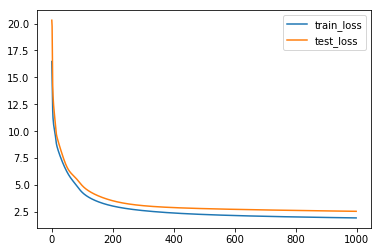

In [9]:
import matplotlib.pyplot as plt
# plt.subplot(211)
plt.plot(losses[1:], label = 'train_loss')
plt.plot(test_losses[1:], label = 'test_loss')
plt.legend()
plt.show()
# plt.subplot(212)
# plt.plot(np.multiply(pred_out(x_test, y_test, weights1, weights2, biases1, biases2)-y_test, pred_out(x_test, y_test, weights1, weights2, biases1, biases2)-y_test).T)

In [8]:
ind = 101
print(pred_out(x_test, y_test, weights1, weights2, biases1, biases2)[:,5:10])
print(y_test[:,5:10])

[[10.79281846 20.28498486 38.4759261  19.48539203 23.31090731]
 [14.42460173 24.60732846 40.85315148 21.62936253 26.81576646]]
[[11.7  19.95 38.57 19.36 24.29]
 [13.88 21.97 43.86 22.73 25.95]]


In [10]:
print(losses[-1])

1.9500193813153945
